# Group Distribution

In this notebook, I will distribute the twelve participants in two even and balanced groups.
To do so I'll randomly assign participants to groups and check their balance with either the [**Student t-test**](https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests) or the [**Mann and Whitney U test**](https://www.geeksforgeeks.org/mann-and-whitney-u-test/) using their answers in the Profile Questionnaire available [here](https://forms.gle/PwTLW2NpdHNK8YAW7).

The test used to check the statistical equivalence of the formed groups are defined by if the sample of each question answers follows a normal distribution for both groups or not. The normality of the answers is verified with the [**Shapiro-Wilk test**](https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/). 

The links for the tutorials I followed to apply each test are available by clicking each test name on the paragraphs before.

First we do the necessary imports to complete this task.

In [21]:
import random
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert as pl

The participants object defined below constains the hashed name of each participant and their answers to these questions (available in the form linked before):
- **Q1**: Do you have any professional experience in Software Development? 
  - No => *0*
  - Less than 1 year => *1*
  - 1 to 2 years => *2*
  - 2 to 4 years => *3*
  - 4 to 6 years => *4*
  - 6 or more years => *5*
- **Q2**: I have experience with tools that allow the creation of diagrams from plain text or code (e.g. PlantUML, Mermaid.JS, others). 
  - Answers in *Likert* scale from *1 to 5*
- Q3: I have experience with tools that allow the creation of diagrams through a visual editor (e.g. draw.io, Lucidchart, others)
  - Answers in *Likert* scale from *1* to *5* 
- Q4: I am familiar with with the Unified Modelling Language (UML).
  - Answers in *Likert* scale from *1* to *5*
- Q5: I have experience creating architecture diagrams.
  - Answers in *Likert* scale from *1* to *5*

To anonymize the partipant names, we used the **hashlib** python library. The hashed names are a 6 characters string (3 bytes).

The correspondance between hash value and person name was stored locally for easier identification of participants for the experiment session organization.

In [22]:
participants = [
    {"name": "c3e7b6", "expID": "", "answers": [1, 1, 4, 4, 3]},
    {"name": "e4b32b", "expID": "", "answers": [1, 1, 5, 5, 4]},
    {"name": "9b4f8f", "expID": "", "answers": [0, 3, 4, 4, 4]},
    {"name": "a4a843", "expID": "", "answers": [1, 4, 5, 4, 4]},
    {"name": "be7d2d", "expID": "", "answers": [1, 1, 4, 4, 3]},
    {"name": "d1401b", "expID": "", "answers": [4, 2, 5, 4, 2]},
    {"name": "8c1894", "expID": "", "answers": [0, 2, 4, 5, 4]},
    {"name": "029958", "expID": "", "answers": [3, 4, 5, 5, 4]},
    {"name": "4893e4", "expID": "", "answers": [4, 2, 5, 5, 5]},
    {"name": "1e31b2", "expID": "", "answers": [3, 1, 5, 5, 5]},
    {"name": "4553bc", "expID": "", "answers": [4, 2, 5, 5, 5]},
    {"name": "0fdd0a", "expID": "", "answers": [3, 2, 5, 5, 4]},
]

numberOfGroups = 2
membersPerGroup = len(participants) / numberOfGroups

print("Number of participants: ", len(participants))
print("Number of groups: ", numberOfGroups)
print("Participants per group: ", membersPerGroup)

Number of participants:  12
Number of groups:  2
Participants per group:  6.0


After constructing the participants object we randomly attribute groups to each partipant.

In [23]:
control = random.sample(participants, int(membersPerGroup))
experimental = [x for x in participants if x not in control]

print("Control Group (CG): ", [x["name"] for x in control])
print("Experimental Group (EG): ", [x["name"] for x in experimental])

Control Group (CG):  ['a4a843', '029958', '8c1894', '4893e4', 'be7d2d', '4553bc']
Experimental Group (EG):  ['c3e7b6', 'e4b32b', '9b4f8f', 'd1401b', '1e31b2', '0fdd0a']


## Data Analysis

Next, we analyze the results of the profile questionnaire and verify the balance between randomly formed groups.

First, we need to change the group constitution to the randomly assigned group that was actually used in the experiment. 

(In the first run of this notebook, the group used was the one randomly generated).

In [24]:
control = [participants[0], participants[2], participants[5], participants[6], participants[9], participants[11]]
experimental = [x for x in participants if x not in control]

print("CG: ", [x["name"] for x in control])
print("EG: ", [x["name"] for x in experimental])

CG:  ['c3e7b6', '9b4f8f', 'd1401b', '8c1894', '1e31b2', '0fdd0a']
EG:  ['e4b32b', 'a4a843', 'be7d2d', '029958', '4893e4', '4553bc']


Then we attribute the assigned experiment ID to each participant.

In [25]:
for p in control:
    assignedID = "SB"
    num = "0"

    match p["name"]:
        case "c3e7b6":
            num = "2"
        case "9b4f8f":
            num = "5"
        case "d1401b":
            num = "6"
        case "8c1894":
            num = "3"
        case "1e31b2":
            num = "1"
        case "0fdd0a":
            num = "4"
    
    p["expID"] = assignedID + num


for p in experimental:
    assignedID = "WM"
    num = "0"

    match p["name"]:
        case "e4b32b":
            num = "4"
        case "a4a843":
            num = "2"
        case "be7d2d":
            num = "5"
        case "029958":
            num = "6"
        case "4893e4":
            num = "3"
        case "4553bc":
            num = "1"

    p["expID"] = assignedID + num


print("CG: ", [x["name"] + " " + x["expID"] for x in control])
print("EG: ", [x["name"] + " " + x["expID"] for x in experimental])

CG:  ['c3e7b6 SB2', '9b4f8f SB5', 'd1401b SB6', '8c1894 SB3', '1e31b2 SB1', '0fdd0a SB4']
EG:  ['e4b32b WM4', 'a4a843 WM2', 'be7d2d WM5', '029958 WM6', '4893e4 WM3', '4553bc WM1']


After that, we check the balance between the groups using the Student t-test or Mann Whitney U test for the values of each answer.
To define which test to use first, we need to run the Shapiro-Wilk test to determine whether the answers follow normal distributions.

First, we define the functions to execute the statistical tests.

In [26]:
def testShapiroWilk(CGQuestionAnswers, EGQuestionAnswers, alpha = 0.05, debug = False):
    CGNormal = False
    EGNormal = False

    _, pCG = shapiro(CGQuestionAnswers)
    _, pEG = shapiro(EGQuestionAnswers)

    CGNormal = pCG > alpha
    EGNormal = pEG > alpha

    if (debug): 
        print(f"(ShapiroWilk) CG Normal? {"Yes" if CGNormal else "No"} - EG Normal? {"Yes" if EGNormal else "No"}") 
        
    return CGNormal, EGNormal

def testMannWhitneyU(CGQuestionAnswers, EGQuestionAnswers, alpha = 0.05, debug = False):
    stat, p_value = mannwhitneyu(CGQuestionAnswers, EGQuestionAnswers)
    if (debug): print("(MWu) Statistics=%.2f, p=%.2f" % (stat, p_value))

    return (p_value > alpha) # Return true if there is no significant difference between the groups (accept null hypothesis); False otherwise

def testTTest(CGQuestionAnswers, EGQuestionAnswers, alpha = 0.05, alt="two-sided", debug = False):
    # alt can be "two-sided", "greater" or "less"
    stat, p_value = ttest_ind(CGQuestionAnswers, EGQuestionAnswers, alternative=alt)
    if (debug): print("(t_test) Statistics=%.2f, p=%.2f" % (stat, p_value))

    return (p_value > alpha) # Return true if there is no significant difference between the groups (accept null hypothesis); False otherwise

def testStatisticalDifference(CGQuestionAnswers, EGQuestionAnswers, alpha = 0.05, altTTest="two-sided", debug = False):
    CGNormal, EGNormal = testShapiroWilk(CGQuestionAnswers, EGQuestionAnswers, alpha, debug)

    if (CGNormal and EGNormal):
        # If both normal do t_test
        print(f"Both groups follow normal distribution")
        print(f"(t_test) Significant statiscal difference? {"No" if testTTest(CGQuestionAnswers, EGQuestionAnswers, alpha, altTTest, debug) else "Yes"}")
    else:
        # Else do Mann-Whitney U test
        print(f"At least one of the groups doesn't follow normal distribution")
        print(f"(MWu) Significant statiscal difference? {"No" if  testMannWhitneyU(CGQuestionAnswers, EGQuestionAnswers, alpha, debug) else "Yes"}")

Then, we create lists for all answers to each question.

In [27]:
CGAnswers = {
    "q1": [x["answers"][0] for x in control],
    "q2": [x["answers"][1] for x in control],
    "q3": [x["answers"][2] for x in control],
    "q4": [x["answers"][3] for x in control],
    "q5": [x["answers"][4] for x in control],
}

EGAnswers = {
    "q1": [x["answers"][0] for x in experimental],
    "q2": [x["answers"][1] for x in experimental],
    "q3": [x["answers"][2] for x in experimental],
    "q4": [x["answers"][3] for x in experimental],
    "q5": [x["answers"][4] for x in experimental],
}

After that, we execute the statistical difference test for each of the questions and print the relvant data.

If both answers follow a normal distributions, a t-test is executed, if not a Mann-Whitney U test is ran.

The Null Hipothesis refered below is **"There is no significant difference between groups"**. 
- If we **reject** it, it means that the difference between the groups is significant, and therefore the groups are **not balanced**.
- If we **accept** it, it means that the differences between groups are not significant, so the groups are **balanced** and therefore usable for the experiment.

In [28]:
for question in CGAnswers:
    print(f"Question {question} ----")
    testStatisticalDifference(CGAnswers[question], EGAnswers[question], debug=True)

Question q1 ----
(ShapiroWilk) CG Normal? Yes - EG Normal? No
At least one of the groups doesn't follow normal distribution
(MWu) Statistics=13.50, p=0.51
(MWu) Significant statiscal difference? No
Question q2 ----
(ShapiroWilk) CG Normal? Yes - EG Normal? Yes
Both groups follow normal distribution
(t_test) Statistics=-0.79, p=0.45
(t_test) Significant statiscal difference? No
Question q3 ----
(ShapiroWilk) CG Normal? No - EG Normal? No
At least one of the groups doesn't follow normal distribution
(MWu) Statistics=12.00, p=0.28
(MWu) Significant statiscal difference? No
Question q4 ----
(ShapiroWilk) CG Normal? No - EG Normal? No
At least one of the groups doesn't follow normal distribution
(MWu) Statistics=15.00, p=0.64
(MWu) Significant statiscal difference? No
Question q5 ----
(ShapiroWilk) CG Normal? Yes - EG Normal? Yes
Both groups follow normal distribution
(t_test) Statistics=-0.96, p=0.36
(t_test) Significant statiscal difference? No


As the results for each question reveal that there are no significant differences between the groups, we can conclude that the groups are **evenly balanced**.

With that conclusion, we can create plots to visually represent the results obtained with the form.

In [29]:
# Defining colors for the plots

color_plantuml = '#FE5F55'
color_visual = '#8CDEDC'

groupPallete = [color_plantuml, color_visual]
colorsLikert = ['#ffffff00', "#d83939", "#df8383", "#fcf39a", "#7bc37b", "#50a158"]

### Professional Experience in Software Engineering

A dataframe is created so that we can easily generate a histogram (countplot) about the professional experiences of the participants.

The results are presented by group.

In [30]:
dfProfExperience = pd.DataFrame()

dfProfExperience["q1"] = CGAnswers["q1"] + EGAnswers["q1"]
dfProfExperience["group"] = ["Control"] * len(CGAnswers["q1"]) + ["Experimental"] * len(EGAnswers["q1"])
dfProfExperience.sort_values(by="q1", inplace=True)

experienceDict = { 0: "None", 1: "Less than 1 year", 2: "1 to 2 years", 3: "2 to 4 years", 4: "4 to 6 years", 5: "6 or more years"}
newAnswersCol = []

for idx in dfProfExperience.index:
    value = dfProfExperience["q1"][idx]
    newAnswersCol.append(experienceDict[value])
    
dfProfExperience.drop("q1", axis=1, inplace=True)
dfProfExperience["Q1"] = newAnswersCol


dfProfExperience

,group,Q1
1,Control,None
3,Control,None
0,Control,Less than 1 year
6,Experimental,Less than 1 year
7,Experimental,Less than 1 year
8,Experimental,Less than 1 year
4,Control,2 to 4 years
5,Control,2 to 4 years
9,Experimental,2 to 4 years
2,Control,4 to 6 years


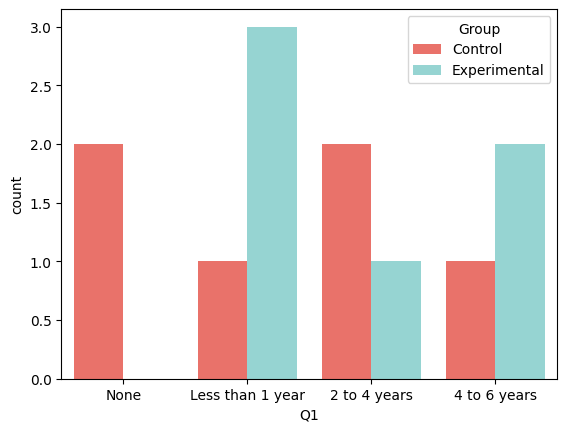

In [31]:
prof_exp_plot = sns.countplot(data=dfProfExperience, x="Q1", hue="group",palette=groupPallete) # mostrar tabela apenas para este
sns.move_legend(prof_exp_plot, "upper right", title="Group")

### Experience with languages and tools

The next set of questions gathered answers in the Likert scale with values from 1-5.

At this stage, we create dataframes for each group answers and then generate likert plots with the **plot_likert** library to better visualize the answers given by participants.

In [32]:
likertScaleDict = {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neither', 4: 'Agree', 5: 'Strongly Agree'}

likertScale = [x for x in likertScaleDict.values()]

questionTexts = {"q1": "Professional Experience", "q2": "PlantUML or others", "q3": "Visual editors", "q4": "UML Language", "q5": "Architecture Diagrams"}

In [33]:
likertCG = pd.DataFrame()


for q in CGAnswers:
    if q == "q1": continue

    answers = []
    for answer in CGAnswers[q]:
        answers.append(likertScaleDict[answer])
    
    likertCG[q.upper()] = answers

likertCG

,Q2,Q3,Q4,Q5
0,Strongly Disagree,Agree,Agree,Neither
1,Neither,Agree,Agree,Agree
2,Disagree,Strongly Agree,Agree,Disagree
3,Disagree,Agree,Strongly Agree,Agree
4,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree
5,Disagree,Strongly Agree,Strongly Agree,Agree


In [34]:
likertEG = pd.DataFrame()

for q in EGAnswers:
    if q == "q1": continue

    answers = []
    for answer in EGAnswers[q]:
        answers.append(likertScaleDict[answer])
    
    likertEG[q.upper()] = answers

likertEG

,Q2,Q3,Q4,Q5
0,Strongly Disagree,Strongly Agree,Strongly Agree,Agree
1,Agree,Strongly Agree,Agree,Agree
2,Strongly Disagree,Agree,Agree,Neither
3,Agree,Strongly Agree,Strongly Agree,Agree
4,Disagree,Strongly Agree,Strongly Agree,Strongly Agree
5,Disagree,Strongly Agree,Strongly Agree,Strongly Agree


c:\Users\Matilde Barra\AppData\Local\Programs\Python\Python312\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Matilde Barra\AppData\Local\Programs\Python\Python312\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


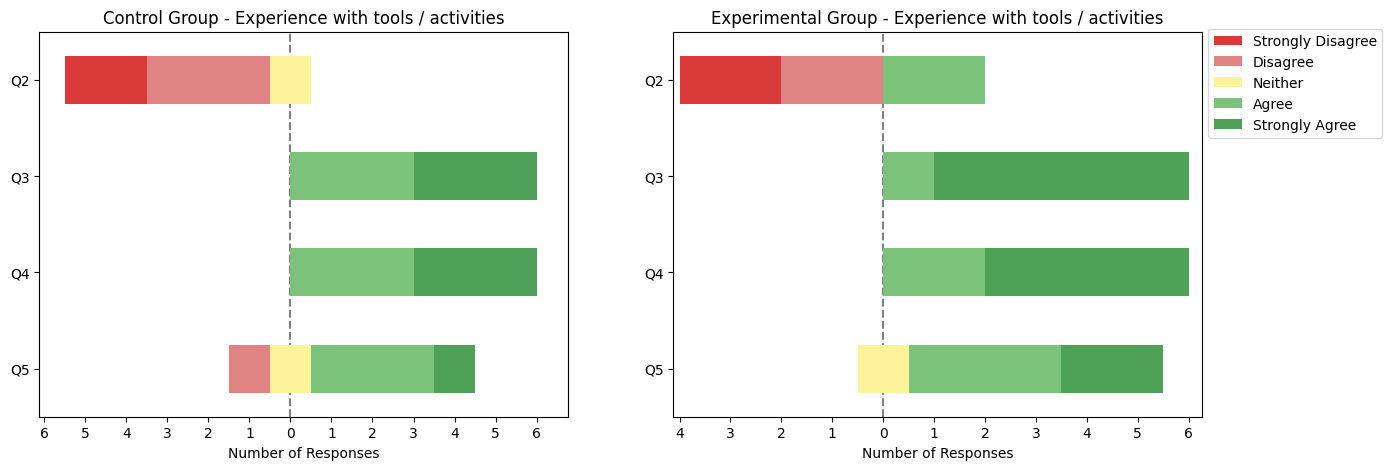

In [35]:
# The plots are made this way so that both are visible at the same time
fig, (cG,eG) = plt.subplots(1, 2, figsize=(15,5))

pl.plot_likert(likertCG, colors=colorsLikert, plot_scale=likertScale, title="Control Group - Experience with tools / activities", ax=cG, legend=False)
pl.plot_likert(likertEG,  colors=colorsLikert, plot_scale=likertScale, title="Experimental Group - Experience with tools / activities", ax=eG, legend=False)

# display a single legend for the whole figure
handles, labels = eG.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.025, 0.9))
plt.show()

The means and standard deviations of the results are also calculated to allow for better understanding of the answers distributions.

Then a histogram is made with the mean values. 

In [36]:
meansCGAnswers = []
stdevCGAnswers = []

for q in CGAnswers:
    meansCGAnswers.append(round(np.mean(CGAnswers[q]), 2))
    stdevCGAnswers.append(round(np.std(CGAnswers[q]), 2))

statisticDataCGAnswers = {
    "Question": list(questionTexts.values()),
    "Mean": meansCGAnswers,
    "StDev": stdevCGAnswers
}

df_statsCGAnswers = pd.DataFrame(statisticDataCGAnswers, columns=['Question', 'Mean', 'StDev'])
df_statsCGAnswers.set_index('Question', inplace=True)
df_statsCGAnswers

,Mean,StDev
Question,,
Professional Experience,1.83,1.57
PlantUML or others,1.83,0.69
Visual editors,4.50,0.50
UML Language,4.50,0.50
Architecture Diagrams,3.67,0.94


In [37]:
meansEGAnswers = []
stdevEGAnswers = []

for q in EGAnswers:
    meansEGAnswers.append(round(np.mean(EGAnswers[q]), 2))
    stdevEGAnswers.append(round(np.std(EGAnswers[q]), 2))

statisticDataEGAnswers = {
    "Question": list(questionTexts.values()),
    "Mean": meansEGAnswers,
    "StDev": stdevEGAnswers
}

df_statsEGAnswers = pd.DataFrame(statisticDataEGAnswers, columns=['Question', 'Mean', 'StDev'])
df_statsEGAnswers.set_index('Question', inplace=True)
df_statsEGAnswers

,Mean,StDev
Question,,
Professional Experience,2.33,1.37
PlantUML or others,2.33,1.25
Visual editors,4.83,0.37
UML Language,4.67,0.47
Architecture Diagrams,4.17,0.69


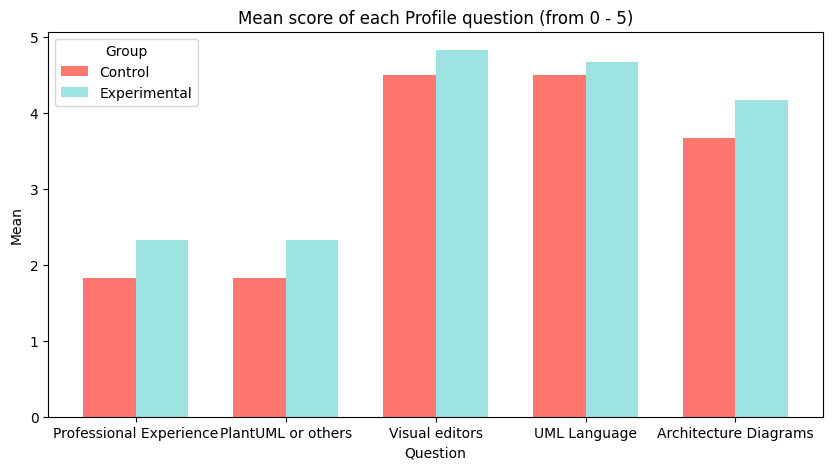

In [38]:
indices = np.arange(len(df_statsCGAnswers))

bar_width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(indices, df_statsCGAnswers['Mean'], bar_width, color=color_plantuml, alpha=0.85, label='Control')
plt.bar(indices + bar_width, df_statsEGAnswers['Mean'], bar_width, color=color_visual, alpha=0.85, label='Experimental')

plt.title('Mean score of each Profile question (from 0 - 5)')
plt.xlabel('Question')
plt.ylabel('Mean')
plt.xticks(indices + bar_width / 2, df_statsCGAnswers.index)
plt.legend(loc='upper left', title='Group')

The plots generated and statistics calculated in this notebook are used for the discussion in **Chapter 6** (Empirical Study) of my **Masters' Dissertation** (A Visual Editor for Creating Living Software Architecture Documentation).